### BB84 Protocol

The BB84 protocol is a Quantum Key Distribution protocol that is based on the polarization states of photons transmitted from two parties, commonly refered to as Alice and Bob. It as proposed in 1984, by Bennett and Brassard, hence the BB84 name. 

To establish a key, Alice sends Bob n bits in the form of a polarized photon which Bob then measures. Alice sends Bob a random qubit (0 or 1) in a randomly chosen basis (Z or X). Bob then measures the qubit using a random measurement basis.

After the bits are transmitted, Alice and Bob both share the bases they used for each bit publically, and they then use the bits that were measured and sent in the same basis to establish a secret key, through the sifting process. 

If an eavesdropper is present (commonly called Eve), she can attempt to decypher the information by intercepting the photon, in any given basis she chooses (Z or X), and resending the measured bit in the chosen basis to minimize transmission. When doing this, she can measure the qubit/photon in the correct basis with a 50% chance, and send the properly encoded photon, or she can use the wrong basis with 50% probability, and send the measured bit in the same basis. 

As per the effect this has on the sifted key, when Eve measures in the correct basis, she will get and emit the correct bit, however, for the case in which she measures a basis different than Alice and Bob, she will encode the measured bit in a state of superposition as seen in Alice's and Bob's basis, hence resulting in a 50/50 probability of measuring either 0 or 1, and introducing noticeable errors or discrepancies in the bits measured by Bob, which will now be different than Alice's, with a 25% probability, due to Eve's interference. 

Assuming ideal hardware performance, in other words without the presence of errors, we can notice Eve's presence if there exists any discrepancy whatsoever between Alice's and Bob's bits after the sifting process. In the presence of errors, this becomes more complex. 

In [1]:
# Standard library imports
import os
import sys

# Adjust the system path to include the project root
# This allows for importing from other directories within the project structure.
project_root = os.path.abspath("..")  # Assumes this script is one level from the root
sys.path.append(project_root)

# Importing functions from src
from src.Q_Communication import qkd
from src.Q_Communication import qkd_errors

In [2]:
Eve = True
n_bits = 32

Alice_bits, Bases, circuits = qkd.initialize(n_bits, Eve)
print(f"Alice's bits are:  {Alice_bits}")
print(f"Alice's bases are: {Bases[0]}")
print(f"Eve's bases are:   {Bases[2]}")
print(f"Bob's bases are:   {Bases[1]}")



Alice's bits are:  [1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1]
Alice's bases are: [1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1]
Eve's bases are:   [1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0]
Bob's bases are:   [0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1]


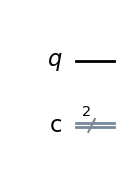

In [3]:
i = 0
qc = circuits[i]
qc.draw('mpl')

In [4]:
qkd.Alice_qc(Alice_bits, Bases[0], circuits)

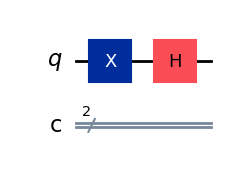

In [5]:
qc = circuits[i]
qc.draw('mpl')

In [6]:
if Eve == True:
    qkd.Eve_qc(circuits, Bases[2])

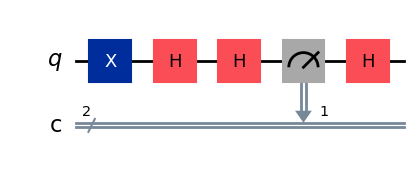

In [7]:
qc = circuits[i]
qc.draw('mpl')

In [8]:
qkd.Bob_qc(circuits, Bases[1])

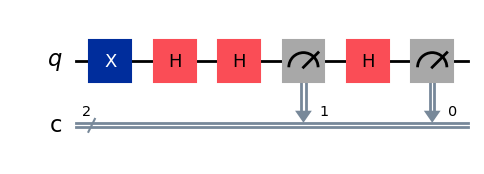

In [9]:
qc = circuits[i]
qc.draw('mpl')

In [10]:
measured_bits = []
Alice_bases = Bases[0]; Bob_bases = Bases[1]
measurements = qkd.run_circuits(circuits, Eve)

In [11]:
qkd_errors.qber(measurements[0], measurements[1])

0.375

The __BB84 protocol__, which was detailed step by step previously, is briefly summarized in the next block of code in the notebook. This function takes in the amount of bits sent in total, and the presence of Eve. After having obtained the sifted key, the QBER (Quantum Bit Error Rate) metric is applied to it, which without the presence of hardware related errors should be 0, and would otherwise indicate the presence of Eve. The function returns the sifted key from Alice's and Bob's perspective, as well as the indices where the bases of the sent photon and the measured one were a match, which is the last list. 

In [12]:
n = 11
qkd.bb84_qkd(2 ** n, True)
print(2 ** n)

The QBER metric is: 0.2713178294573643
2048


In [21]:
import numpy as np
from numpy import exp, pi

x = 1
k = 2
exp(2 * pi * 1j * x * (1/(2**k)))

np.complex128(6.123233995736766e-17+1j)